In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Data-Driven Insights on Health and Lifestyle: Analyzing Correlations and Testing Hypotheses

#### Smoking Dataset



In this project, I will analyze the "smoking" dataset to identify relationships and test hypotheses about smoking habits and health outcomes such as cholesterol, fasting blood sugar, triglyceride, GTP among others.

In [7]:
data = pd.read_csv("smoking.csv")
data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


### Exploratory Data Analysis

In the project's initial phase, data exploration will be conducted to summarize essential statistics, such as mean, median, and standard deviation for the continuous variables. Along with data cleaning that improves data quality.

In [31]:
data.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [36]:
data.duplicated().sum()

0

In [283]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [53]:
data.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [61]:
data.groupby('smoking')['age'].mean()

smoking
0    45.677981
1    41.607431
Name: age, dtype: float64

In [264]:
data.groupby('smoking')['weight(kg)'].mean()

smoking
0    62.907455
1    70.959668
Name: weight(kg), dtype: float64

In [268]:
data.groupby('smoking')['systolic'].mean()

smoking
0    120.732440
1    122.806502
Name: systolic, dtype: float64

In [226]:
data.groupby('smoking')['fasting blood sugar'].mean()

smoking
0     97.723501
1    102.049328
Name: fasting blood sugar, dtype: float64

In [224]:
data.groupby('smoking')['Cholesterol'].mean()

smoking
0    197.690921
1    195.541384
Name: Cholesterol, dtype: float64

In [58]:
data.groupby('smoking')['triglyceride'].mean()

smoking
0    112.921957
1    150.341481
Name: triglyceride, dtype: float64

In [242]:
data.groupby('smoking')['age'].std()

smoking
0    12.167770
1    11.455074
Name: age, dtype: float64

In [244]:
data.groupby('smoking')['weight(kg)'].std()

smoking
0    12.328321
1    12.027339
Name: weight(kg), dtype: float64

In [246]:
data.groupby('smoking')['fasting blood sugar'].std()

smoking
0    18.008387
1    24.636452
Name: fasting blood sugar, dtype: float64

In [248]:
data.groupby('smoking')['Cholesterol'].std()

smoking
0    36.196094
1    36.433506
Name: Cholesterol, dtype: float64

In [254]:
data.groupby('smoking')['triglyceride'].std()

smoking
0    63.403353
1    78.502550
Name: triglyceride, dtype: float64

#### Distribution Visualizations

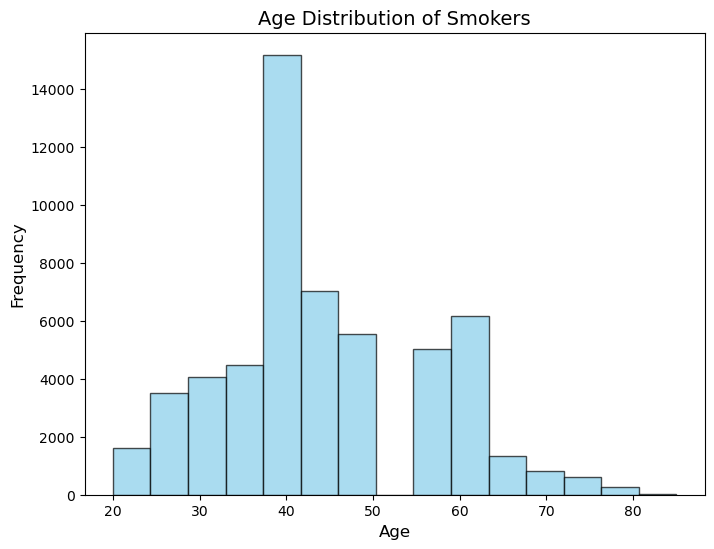

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Smokers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

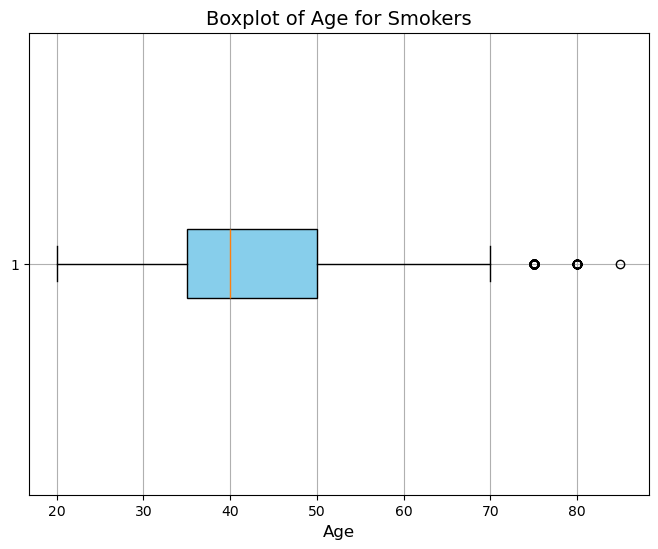

In [70]:
plt.figure(figsize=(8, 6))
plt.boxplot(smokers_data['age'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot of Age for Smokers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.grid(True)

In these charts, we can observe that the mean smoker age is 41, with the most smokers in the range between 30 and 60, with some outliers (especially some elderly people).  

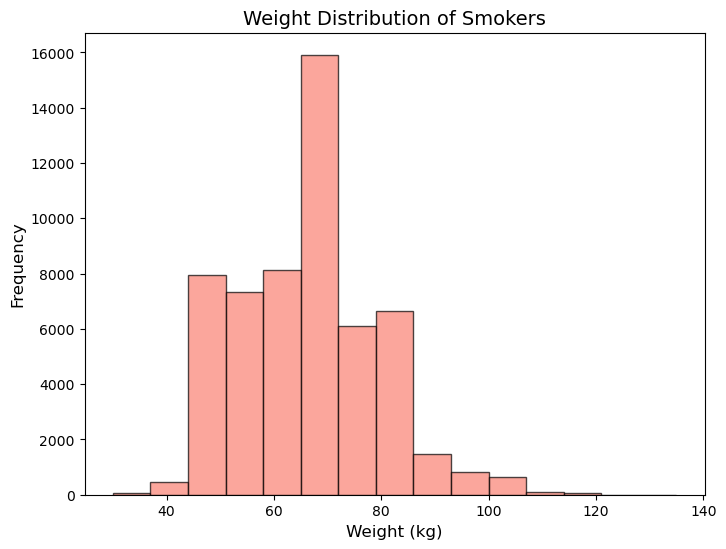

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(data['weight(kg)'], bins=15, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Weight Distribution of Smokers', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

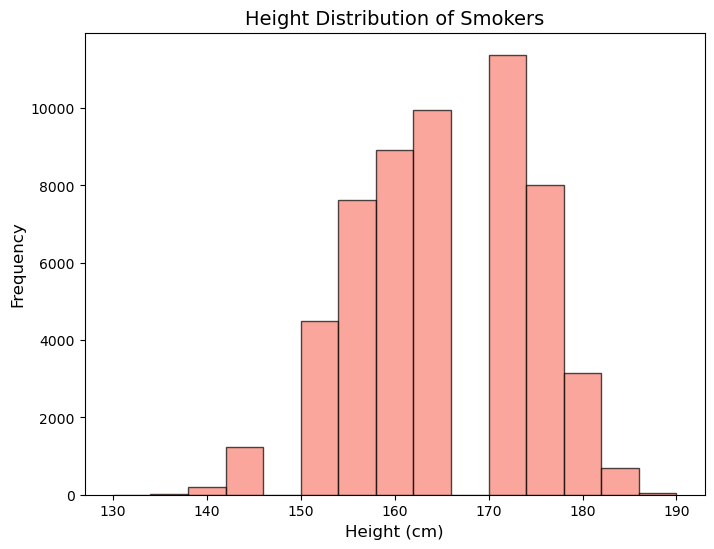

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(data['height(cm)'], bins=15, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Height Distribution of Smokers', fontsize=14)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

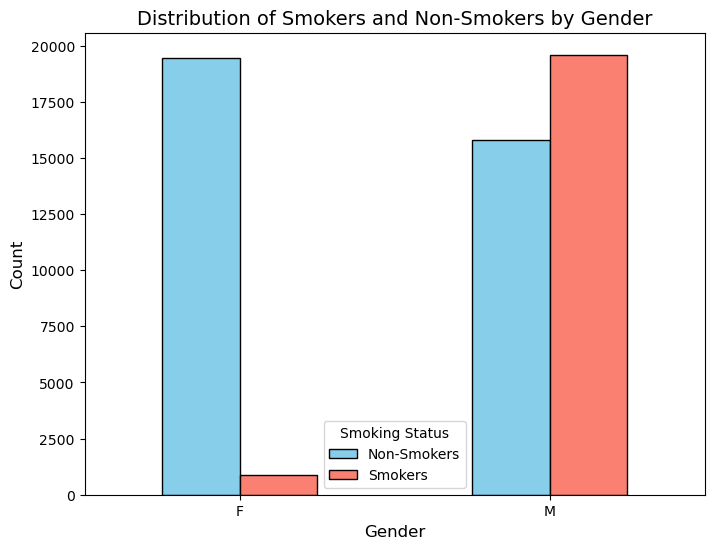

In [51]:
smokers_by_gender.plot(kind='bar', stacked=False, figsize=(8, 6), color=['skyblue', 'salmon'], edgecolor = 'black')

plt.title('Distribution of Smokers and Non-Smokers by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Non-Smokers', 'Smokers'], title='Smoking Status')

plt.show()

In [187]:
smoking_by_gender_age = data[data['smoking'] == 1].groupby(['gender', 'age']).size().reset_index(name='number_of_smokers')
smoking_by_gender_age

,gender,age,number_of_smokers
0,F,20,2
1,F,30,1
2,F,40,406
3,F,45,150
4,F,50,105
5,F,55,67
6,F,60,108
7,F,65,11
8,F,70,5
9,F,75,3


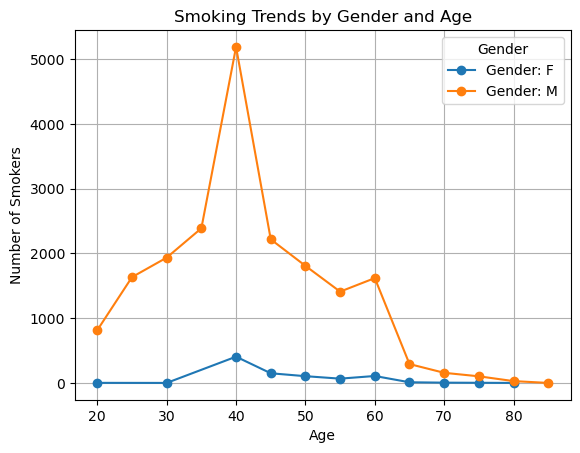

In [189]:
for gender in smoking_by_gender_age['gender'].unique():
    subset = smoking_by_gender_age[smoking_by_gender_age['gender'] == gender]
    plt.plot(subset['age'], subset['number_of_smokers'], marker='o', label=f"Gender: {gender}")

plt.title('Smoking Trends by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Number of Smokers')
plt.legend(title="Gender")
plt.grid(True)

plt.show()

Another interesting fact that we can point out is the significant discrepancy between male smokers and female smokers, implying a bigger smoking behaviour among males. There is a definite pattern in both genders, with the number of smokers increasing from the 20s to the 40s and then declining significantly after the 40s, particularly among men.

#### Hypothesis Testing

##### Hypothesis 1: Null hypothesis: "The mean fasting blood sugar level of smokers is equal to or less than 100 mg/dL. Recommended by World Health Organization(WHO)."

##### Alternative hypothesis: "The mean fasting blood sugar level of smokers is greater than 100 mg/dL."

In [35]:
smokers_fasting_blood_sugar = data[data['smoking'] == 1]['fasting blood sugar']

sample_mean = smokers_fasting_blood_sugar.mean()
sample_std = smokers_fasting_blood_sugar.std()
sample_size = smokers_fasting_blood_sugar.shape[0]
population_mean = 100

z_score = (sample_mean - population_mean) / (sample_std / (np.sqrt(sample_size)))
p_value = 1 - stats.norm.cdf(z_score)

print(f"Z-statistic: {z_score}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean fasting blood sugar level of smokers is greater than 100 mg/dL.")
else:
    print("Fail to reject the null hypothesis: The mean fasting blood sugar level of smokers is equal to or less than 100 mg/dL. Recommended by World Health Organization(WHO).")

Z-statistic: 11.896877810414125
P-value: 0.0
Reject the null hypothesis: The mean fasting blood sugar level of smokers is greater than 100 mg/dL.


The Z-score for the test is approximately 11.90, with a p-value of virtually 0. We can reject the null hypothesis and conclude smokers have substantially higher fasting blood sugar levels than the recommended 100. This conclusion suggests that smoking could be associated with poor glycemic control or insulin resistance. Elevated fasting blood sugar levels are a key indicator of insulin resistance and a precursor to Type 2 diabetes. Smoking is already known to contribute to cardiovascular disease and other health risks. This finding adds to the body of evidence linking smoking to dysregulated glucose metabolism.


##### Hypothesis 2: Null hypothesis: "The mean triglyceride level of smokers is less than 150 mg/dL." Recommended by World Health Organization(WHO)

##### Alternative hypothesis: "The mean triglyceride level of smokers is greater than 150 mg/dL."

In [37]:
smokers_triglyceride = data[data['smoking'] == 1]['triglyceride']

sample_mean = smokers_triglyceride.mean()
sample_std = smokers_triglyceride.std()
sample_size = smokers_triglyceride.shape[0]
population_mean = 150

z_score = (sample_mean - population_mean) / (sample_std / (np.sqrt(sample_size)))
p_value = 1 - stats.norm.cdf(z_score)

print(f"Z-statistic: {z_score}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean triglyceride level of smokers is greater than 150 mg/dL.")
else:
    print("Fail to reject the null hypothesis: The mean triglyceride level of smokers is less than 150 mg/dL.")

Z-statistic: 0.6221325230978906
P-value: 0.26692736547091855
Fail to reject the null hypothesis: The mean triglyceride level of smokers is less than 150 mg/dL.


The Z-score approximately 0.62, with a p-value of 0.27. Since the Z-score is still below the critical value (1.645 for a 95% confidence level), and the p-value is higher than 0.05, we do not have enough evidence to reject the null hypothesis. Because there is no significant evidence that smokers have higher triglyceride levels than the recommended threshold of 150. However, the triglyceride levels of smokers and non-smokers are significantly different. The data indicates that smokers have significantly higher triglyceride levels than non-smokers.

High Triglycerides and Cardiovascular Disease: Elevated triglycerides are a significant risk factor for atherosclerosis, where plaques form in the arteries, restricting blood flow and increasing the risk of heart attack, stroke, and peripheral artery disease.
When combined with smoking—a known risk factor for cardiovascular disease—the effects on heart health are compounded. The presence of both high triglycerides and smoking can synergistically increase the risk of developing cardiovascular complications much more than either factor alone.
Smokers, therefore, face a heightened risk of coronary artery disease, hypertension, and other cardiovascular issues, partly due to their elevated triglyceride levels.

#### Correlation Testing

##### Pearson Correlation

In [140]:
from scipy.stats import pearsonr

pearson_correlation, _ = pearsonr(data['fasting blood sugar'], data['triglyceride'])

print(pearson_correlation) 

0.22774575607971734


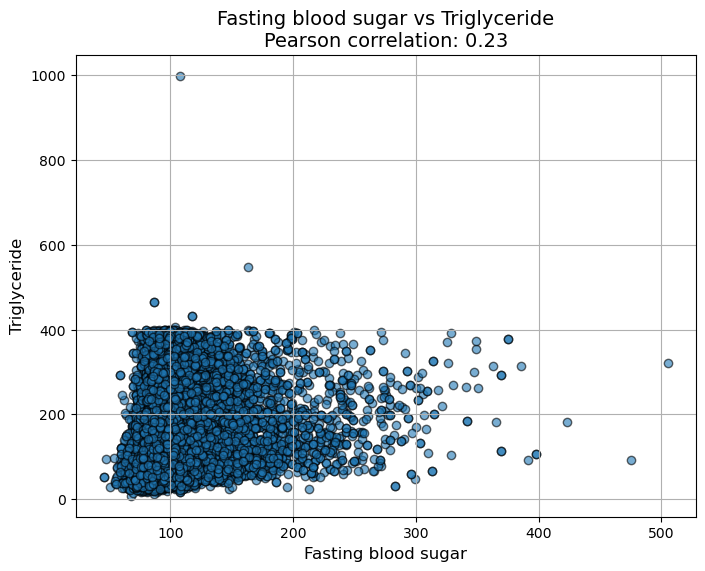

In [144]:
plt.figure(figsize=(8, 6))
plt.scatter(data['fasting blood sugar'], data['triglyceride'], alpha=0.6, edgecolor='black', label='Data points')
plt.title(f'Fasting blood sugar vs Triglyceride\nPearson correlation: {pearson_correlation:.2f}', fontsize=14)
plt.xlabel('Fasting blood sugar', fontsize=12)
plt.ylabel('Triglyceride', fontsize=12)
plt.grid(True)

plt.show()

The Pearson correlation coefficient of 0.23 between fasting blood sugar and triglycerides suggests a weak to moderate positive correlation. This means that there is a slight tendency for higher fasting blood sugar levels to be associated with higher triglyceride levels. While the correlation is weak, this could still indicate some degree of physiological interaction. Elevated fasting blood sugar and triglycerides could be indicative of metabolic disturbances such as insulin resistance or diabetes.

#### Phi Coefficient

In [247]:
import pandas as pd
from scipy.stats import chi2_contingency

In [249]:
data['gender_binary'] = data['gender'].map({'M': 1, 'F': 0})

contingency_table = pd.crosstab(data['gender_binary'], data['smoking'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum() 
phi_coefficient = np.sqrt(chi2 / n)

contingency_table, phi_coefficient

(smoking            0      1
 gender_binary              
 0              19432    859
 1              15805  19596,
 0.5103009663133494)

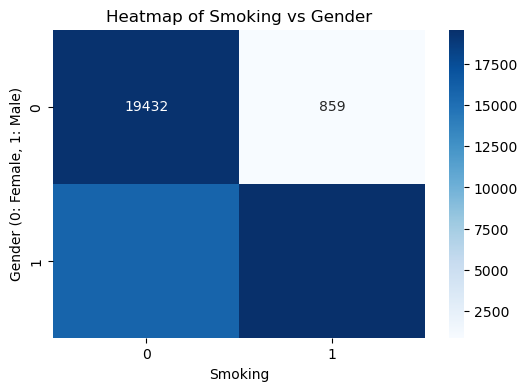

In [251]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")

plt.title('Heatmap of Smoking vs Gender')
plt.xlabel('Smoking')
plt.ylabel('Gender (0: Female, 1: Male)')

plt.show()

Moderate to Strong Association: The Phi coefficient of 0.51 suggests that gender is an important factor in smoking behavior. There is a clear differentiation between the smoking habits of males and females in this dataset. Typically, smoking predominance has historically been higher in males than females, and this could be reflected in the dataset. Also by the amount of males way higher than females smokers.

#### Point-Biserial Correlation

In [89]:
from scipy.stats import pointbiserialr

In [138]:
pb_correlation, _ = pointbiserialr(data['smoking'], data['triglyceride'])

print("Point-Biserial Correlation", pb_correlation)

Point-Biserial Correlation 0.25179904708008244


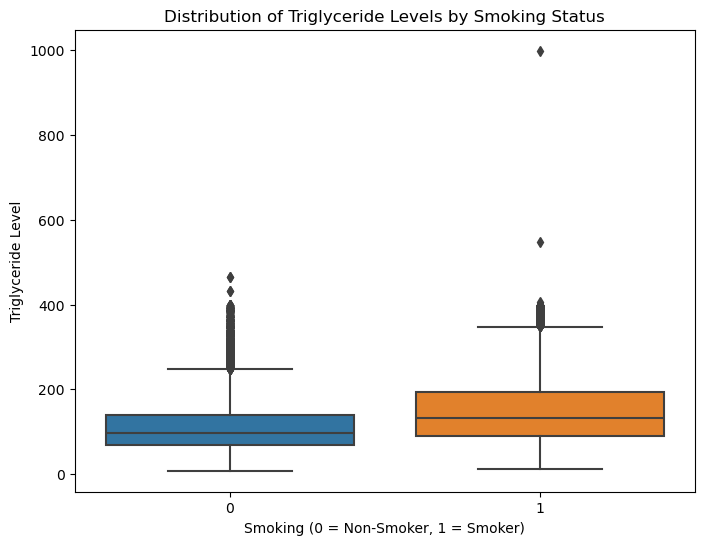

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking', y='triglyceride', data=data)

plt.xlabel('Smoking (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Triglyceride Level')
plt.title('Distribution of Triglyceride Levels by Smoking Status')

plt.show()

The correlation coefficient of 0.25 indicates a weak positive relationship between smoking and Triglyceride levels. Which suggests that individuals who smoke tend to have higher triglyceride levels compared to those who don't smoke, on average. In other words, smoking might be associated with an increase in triglyceride levels. 

### Insights

#### Real-World Application

"Combined health risks of cigarette smoking and low levels of physical activity: a prospective cohort study in England with 12-year follow-up"

Objectives: This study aimed to assess the combined risks of cigarette smoking and physical inactivity on chronic diseases, disability, and depressive symptoms. The goal was to determine whether these behaviours had additive or synergistic effects on health outcomes.

Key Findings:

Both smoking and low levels of physical activity were independently associated with increased risk for chronic diseases such as coronary heart disease (CHD), stroke, cancer, and chronic lung disease over a 12-year follow-up.
The combination of current smoking and low physical activity significantly increased the risk of developing poor health outcomes. Smokers with low physical activity had an exceptionally high risk of developing conditions such as poor self-rated health and chronic diseases, with adjusted relative risk ranging from 1.89 to 14.00 when compared with highly active non-smokers.

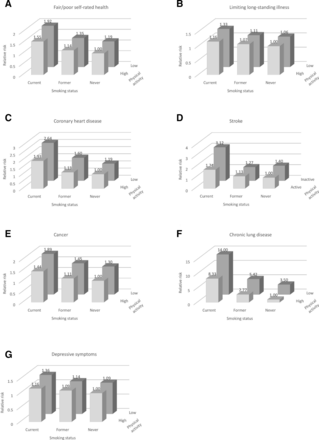

#### Conclusions

##### Summary of methods and Insights
In this analysis, I've started performing the Exploratory data analysis together with the data cleaning, checking for data with quality and accuracy so the analysis can have more reliability. To find the necessary statistical metrics for the variables, we will work with throughout this project. After that a short analysis about the gender, age and weight among the individuals within the dataset to better understand this metrics, including a few visualizations.

Then, in The Hypothesis part, I performed the Z-test for the two hypotheses, starting with "The mean fasting blood sugar level of smokers is equal to or less than 100", which was rejected with a high z-value and p-value less than the significance level of 0.05, where the result suggests that smokers tend to have slightly higher fasting blood sugar levels. However, even minor increases in fasting blood sugar can be concerning if persistent, as they might point to an increased risk of developing Type 2 diabetes. Diabetes, in turn, exacerbates the risk of cardiovascular disease, kidney disease, and neuropathy. So, while the increase in blood sugar might not appear significant in smokers, it can still be dangerous in the long term.

In the second hypothesis, "The mean triglyceride level of smokers is less than 150." We fail to reject the null hypothesis with a z-value of 0.62 and p-value of 0.26, way higher than the significance level, where the result also suggests that smokers have slightly higher triglyceride levels. Elevated triglycerides are a known risk factor for cardiovascular diseases, such as heart disease and stroke, as they can lead to hardening or thickening of the arteries. Even if the increase in triglycerides among smokers is modest, it may compound with other risk factors (such as high cholesterol or high blood pressure) to increase cardiovascular risk.5
Advancing to correlation tests, the Pearson correlation was the first one between fasting blood sugar and triglycerides, suggesting a weak to moderate positive correlation, approximately 0.23. Indicates that there might be a physiological link between these two factors. Smoking, known for contributing to insulin resistance, may play a role in this relationship, pushing both triglycerides and blood sugar levels upwards.

The second test was the Phi coefficient between smoking and gender, of 0.51 which confirms the findings in the smoking trends by gender at the beginning of the analysis and suggests a strong association with more male smokers than female smokers. The strong association between gender and smoking observed in this dataset provides important insights into smoking behaviour. It highlights gender as a key determinant of smoking habits, where men might experience more pronounced effects of smoking on triglycerides and blood sugar due to higher smoking rates, contributing to their overall cardiovascular risk profile.

Moving to the third test, the Point-Biserial correlation between Smoking status and triglyceride levels (approximately 0.25) shows a weak but present association between smoking and higher triglyceride levels. While not highly significant, it reinforces the idea that smoking has an adverse effect on lipid metabolism.

While the correlations found are not strong, they indicate a consistent pattern where smoking appears to contribute to elevated triglycerides and fasting blood sugar. These increases point toward an increased metabolic risk. The weak to moderate correlations between fasting blood sugar, triglycerides, and smoking could be a precursor to more serious health outcomes. Given that smoking affects insulin sensitivity and lipid metabolism, it’s likely that smokers, especially male smokers (as indicated by the Phi coefficient), are at a greater risk for both diabetes and cardiovascular diseases in the long run..

#### Recommendations

Public health interventions should consider these differences among genders when designing campaigns and policies, focusing on men due to the huge difference found in this analysis. These results underscore the importance of integrating lipid management into smoking cessation programs, emphasizing the cardiovascular benefits of quitting smoking. Regular screening and targeted interventions for smokers, focusing on both smoking cessation and metabolic health, can help reduce the long-term health risks associated with elevated triglycerides.

Along with the necessity of changes in lifestyle, where there are other contributing factors, such as diet, alcohol consumption, or genetics, that also play a role. As we note in the study about smoking habits and physical inactivity. People who smoke and have low physical activity levels have a higher risk of coronary diseases, stroke, chronic lung disease and depression symptoms. This reinforces the necessity of having a balanced diet, exercising actively and quitting smoking to improve health outcomes and reduce the risk of all the diseases mentioned previously. Seeking a healthy life.

##### References

https://bmjopen.bmj.com/content/9/11/e032852

In [ ]:
smoking_by_weight_height = data[data['smoking'] == 1].groupby(['weight(kg)', 'height(cm)']).size().reset_index(name='number_of_smokers')
smoking_by_weight_height